# Data Cleaning

### Install Required Libraries

In [28]:
# Install required libraries
# Run this cell to install all necessary packages

import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn plotly missingno scipy statsmodels ipywidgets tqdm

print("All required libraries installed successfully")

All required libraries installed successfully



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
try:
    # For newer matplotlib versions
    plt.style.use('seaborn')
except:
    # For older matplotlib versions
    plt.style.use('default')

# Seaborn settings
sns.set_theme(style="whitegrid")
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully")

Libraries imported successfully


### Load Data

In [30]:
# Loading data - Corrected file path
# Make sure files are in the correct location

# Option 2: If you want to specify the full path (absolute path)
screen_time_df = pd.read_csv('C:/Users/Unal/Desktop/Uni-Y2S2/DPV/Projects/screenimpact/data/screen_time_app_usage_dataset.csv')
mental_health_df = pd.read_csv('C:/Users/Unal/Desktop/Uni-Y2S2/DPV/Projects/screenimpact/data/digital_diet_mental_health.csv')

# Option 3: If files are in the same directory as your Jupyter Notebook
# screen_time_df = pd.read_csv('screen_time_app_usage_dataset.csv')
# mental_health_df = pd.read_csv('digital_diet_mental_health.csv')

# Check if files exist
import os
print("File exists (screen_time):", os.path.exists('data/screen_time_app_usage_dataset.csv'))
print("File exists (mental_health):", os.path.exists('data/digital_diet_mental_health.csv'))

# Check data dimensions
print("Screen time dataset shape:", screen_time_df.shape)
print("Mental health dataset shape:", mental_health_df.shape)

# Examine first few rows
print("\nScreen time dataset first 5 rows:")
print(screen_time_df.head())

print("\nMental health dataset first 5 rows:")
print(mental_health_df.head())

File exists (screen_time): False
File exists (mental_health): False
Screen time dataset shape: (3000, 24)
Mental health dataset shape: (2000, 25)

Screen time dataset first 5 rows:
   user_id                           date     app_name       category  \
0     1051  2024-01-01 00:00:00.000000000       Camera      Utilities   
1     1088  2024-01-01 00:43:41.673891297       Chrome      Utilities   
2     1052  2024-01-01 01:27:23.347782594      Spotify  Entertainment   
3     1028  2024-01-01 02:11:05.021673891  Google Maps      Utilities   
4     1034  2024-01-01 02:54:46.695565188    Instagram         Social   

   screen_time_min  launches  interactions  is_productive  youtube_views  \
0            24.53         2             7          False            NaN   
1            19.78         3             2          False            NaN   
2            32.03         1             6          False            NaN   
3            19.10         2             5          False            NaN   


###  Data Exploration

In [3]:
# Exploratory data analysis

# Data types for screen time dataset
print("Screen time dataset data types:")
print(screen_time_df.dtypes)

# Data types for mental health dataset
print("\nMental health dataset data types:")
print(mental_health_df.dtypes)

# Check for missing values in screen time dataset
print("\nMissing values in screen time dataset:")
print(screen_time_df.isnull().sum())
print(f"Percentage of missing values: {screen_time_df.isnull().sum().sum() / (screen_time_df.shape[0] * screen_time_df.shape[1]) * 100:.2f}%")

# Check for missing values in mental health dataset
print("\nMissing values in mental health dataset:")
print(mental_health_df.isnull().sum())
print(f"Percentage of missing values: {mental_health_df.isnull().sum().sum() / (mental_health_df.shape[0] * mental_health_df.shape[1]) * 100:.2f}%")

# Summary statistics for screen time dataset
print("\nSummary statistics for screen time dataset:")
print(screen_time_df.describe())

# Summary statistics for mental health dataset
print("\nSummary statistics for mental health dataset:")
print(mental_health_df.describe())

# Category distribution in screen time dataset
print("\nCategory distribution in screen time dataset:")
print(screen_time_df['category'].value_counts())

# Productive vs non-productive app usage
print("\nProductive vs non-productive app usage:")
print(screen_time_df['is_productive'].value_counts())

Screen time dataset data types:


NameError: name 'screen_time_df' is not defined

### Clean Screen Time Dataset

In [34]:
# Clean screen_time_app_usage_dataset.csv

# 1. Convert date column to datetime format
screen_time_df['date'] = pd.to_datetime(screen_time_df['date'])

# 2. Identify unnecessary columns (extra_col_ columns)
extra_cols = [col for col in screen_time_df.columns if 'extra_col_' in col]
print(f"Removing {len(extra_cols)} unnecessary columns: {extra_cols}")

# 3. Remove unnecessary columns
screen_time_df = screen_time_df.drop(columns=extra_cols)

# 4. Handle missing values in YouTube-related columns (for non-YouTube apps)
youtube_cols = ['youtube_views', 'youtube_likes', 'youtube_comments']
for col in youtube_cols:
    # Fill missing values with 0 for non-YouTube apps
    screen_time_df[col] = screen_time_df[col].fillna(0)

# 5. Detect outliers (using Z-score method)
numeric_cols = screen_time_df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((screen_time_df[numeric_cols] - screen_time_df[numeric_cols].mean()) / screen_time_df[numeric_cols].std())
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()} out of {len(screen_time_df)} records ({outliers.sum()/len(screen_time_df)*100:.2f}%)")

# 6. Save a copy of outliers for analysis
outliers_df = screen_time_df[outliers]

# 7. Fix data types
screen_time_df['user_id'] = screen_time_df['user_id'].astype(str)
screen_time_df['is_productive'] = screen_time_df['is_productive'].astype(bool)

# 8. View cleaned dataset
print(f"\nCleaned screen time dataset shape: {screen_time_df.shape}")
print(screen_time_df.head())

Removing 0 unnecessary columns: []
Number of outliers detected: 173 out of 3000 records (5.77%)

Cleaned screen time dataset shape: (3000, 11)
  user_id                          date     app_name       category  \
0    1051 2024-01-01 00:00:00.000000000       Camera      Utilities   
1    1088 2024-01-01 00:43:41.673891297       Chrome      Utilities   
2    1052 2024-01-01 01:27:23.347782594      Spotify  Entertainment   
3    1028 2024-01-01 02:11:05.021673891  Google Maps      Utilities   
4    1034 2024-01-01 02:54:46.695565188    Instagram         Social   

   screen_time_min  launches  interactions  is_productive  youtube_views  \
0            24.53         2             7          False            0.0   
1            19.78         3             2          False            0.0   
2            32.03         1             6          False            0.0   
3            19.10         2             5          False            0.0   
4            25.19         1             5        

###  Clean Mental Health Dataset

In [2]:
# Clean digital_diet_mental_health.csv

# 1. Fix data types
mental_health_df['user_id'] = mental_health_df['user_id'].astype(str)
mental_health_df['uses_wellness_apps'] = mental_health_df['uses_wellness_apps'].astype(bool)
mental_health_df['eats_healthy'] = mental_health_df['eats_healthy'].astype(bool)

# 2. Check for outliers in numeric columns
numeric_cols = mental_health_df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((mental_health_df[numeric_cols] - mental_health_df[numeric_cols].mean()) / mental_health_df[numeric_cols].std())
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected in mental health dataset: {outliers.sum()} out of {len(mental_health_df)} records ({outliers.sum()/len(mental_health_df)*100:.2f}%)")

# 3. Check for inconsistent values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['gender', 'location_type']:
    print(f"{col}: {mental_health_df[col].unique()}")

# 4. Check score ranges
score_cols = ['sleep_quality', 'mood_rating', 'stress_level', 'mental_health_score', 
              'weekly_anxiety_score', 'weekly_depression_score']

for col in score_cols:
    print(f"{col} range: {mental_health_df[col].min()} - {mental_health_df[col].max()}")

# 5. View cleaned dataset
print(f"\nCleaned mental health dataset shape: {mental_health_df.shape}")
print(mental_health_df.head())

NameError: name 'mental_health_df' is not defined

### Feature Engineering - Screen Time Dataset

In [1]:
# Clean digital_diet_mental_health.csv

# 1. Fix data types
mental_health_df['user_id'] = mental_health_df['user_id'].astype(str)
mental_health_df['uses_wellness_apps'] = mental_health_df['uses_wellness_apps'].astype(bool)
mental_health_df['eats_healthy'] = mental_health_df['eats_healthy'].astype(bool)

# 2. Check for outliers in numeric columns
numeric_cols = mental_health_df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((mental_health_df[numeric_cols] - mental_health_df[numeric_cols].mean()) / mental_health_df[numeric_cols].std())
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected in mental health dataset: {outliers.sum()}")

# 3. Save outliers for analysis
mh_outliers_df = mental_health_df[outliers]

# 4. Handle outliers (keeping them for now)
# mental_health_df = mental_health_df[~outliers]  # Uncomment to remove outliers

# 5. Check for inconsistent values
print("\nUnique values in categorical columns:")
for col in ['gender', 'location_type']:
    print(f"{col}: {mental_health_df[col].unique()}")

# 6. Correct any inconsistent scale values
# Ensure all scores are in their expected ranges
score_cols = ['sleep_quality', 'mood_rating', 'stress_level', 'mental_health_score', 
              'weekly_anxiety_score', 'weekly_depression_score']

for col in score_cols:
    print(f"{col} range: {mental_health_df[col].min()} - {mental_health_df[col].max()}")

# 7. View cleaned dataset
print("\nCleaned mental health dataset shape:", mental_health_df.shape)
print(mental_health_df.head())

NameError: name 'mental_health_df' is not defined

In [17]:
# Create derived features for screen time dataset

# 1. Extract date components
screen_time_df['day'] = screen_time_df['date'].dt.day
screen_time_df['month'] = screen_time_df['date'].dt.month
screen_time_df['year'] = screen_time_df['date'].dt.year
screen_time_df['day_of_week'] = screen_time_df['date'].dt.dayofweek
screen_time_df['is_weekend'] = screen_time_df['day_of_week'].isin([5, 6])  # 5=Sat, 6=Sun

# 2. Create time of day categories
screen_time_df['hour'] = screen_time_df['date'].dt.hour
screen_time_df['time_of_day'] = pd.cut(
    screen_time_df['hour'], 
    bins=[0, 6, 12, 18, 24], 
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    include_lowest=True
)

# 3. Calculate engagement ratio (interactions per minute)
screen_time_df['engagement_ratio'] = screen_time_df['interactions'] / screen_time_df['screen_time_min']
screen_time_df['engagement_ratio'] = screen_time_df['engagement_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 4. Calculate app usage intensity (launches per screen time)
screen_time_df['usage_intensity'] = screen_time_df['launches'] / screen_time_df['screen_time_min']
screen_time_df['usage_intensity'] = screen_time_df['usage_intensity'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 5. View the new features
print("Screen time dataset with derived features:")
print(screen_time_df.head())

Screen time dataset with derived features:
  user_id                          date     app_name       category  \
0    1051 2024-01-01 00:00:00.000000000       Camera      Utilities   
1    1088 2024-01-01 00:43:41.673891297       Chrome      Utilities   
2    1052 2024-01-01 01:27:23.347782594      Spotify  Entertainment   
3    1028 2024-01-01 02:11:05.021673891  Google Maps      Utilities   
4    1034 2024-01-01 02:54:46.695565188    Instagram         Social   

   screen_time_min  launches  interactions  is_productive  youtube_views  \
0            24.53         2             7          False            0.0   
1            19.78         3             2          False            0.0   
2            32.03         1             6          False            0.0   
3            19.10         2             5          False            0.0   
4            25.19         1             5          False            0.0   

   youtube_likes  youtube_comments  day  month  year  day_of_week  is_wee

In [18]:
# Create derived features for mental health dataset

# 1. Calculate total device usage
mental_health_df['total_device_usage'] = mental_health_df['phone_usage_hours'] + \
                                        mental_health_df['laptop_usage_hours'] + \
                                        mental_health_df['tablet_usage_hours'] + \
                                        mental_health_df['tv_usage_hours']

# 2. Calculate usage purpose ratio
mental_health_df['social_ratio'] = mental_health_df['social_media_hours'] / mental_health_df['daily_screen_time_hours']
mental_health_df['work_ratio'] = mental_health_df['work_related_hours'] / mental_health_df['daily_screen_time_hours']
mental_health_df['entertainment_ratio'] = mental_health_df['entertainment_hours'] / mental_health_df['daily_screen_time_hours']
mental_health_df['gaming_ratio'] = mental_health_df['gaming_hours'] / mental_health_df['daily_screen_time_hours']

# Replace NaN, inf values with 0
ratio_cols = ['social_ratio', 'work_ratio', 'entertainment_ratio', 'gaming_ratio']
mental_health_df[ratio_cols] = mental_health_df[ratio_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

# 3. Create age groups
mental_health_df['age_group'] = pd.cut(
    mental_health_df['age'], 
    bins=[0, 18, 30, 45, 60, 100], 
    labels=['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'],
    include_lowest=True
)

# 4. Create mental health indicators
mental_health_df['anxiety_depression_sum'] = mental_health_df['weekly_anxiety_score'] + mental_health_df['weekly_depression_score']
mental_health_df['wellness_score'] = mental_health_df['mental_health_score'] - mental_health_df['anxiety_depression_sum']

# 5. Calculate screen-sleep balance
mental_health_df['screen_sleep_ratio'] = mental_health_df['daily_screen_time_hours'] / mental_health_df['sleep_duration_hours']
mental_health_df['screen_sleep_ratio'] = mental_health_df['screen_sleep_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 6. View the new features
print("Mental health dataset with derived features:")
print(mental_health_df.head())

Mental health dataset with derived features:
  user_id  age  gender  daily_screen_time_hours  phone_usage_hours  \
0  user_1   51  Female                      4.8                3.4   
1  user_2   64    Male                      3.9                3.5   
2  user_3   41   Other                     10.5                2.1   
3  user_4   27   Other                      8.8                0.0   
4  user_5   55    Male                      5.9                1.7   

   laptop_usage_hours  tablet_usage_hours  tv_usage_hours  social_media_hours  \
0                 1.3                 1.6             1.6                 4.1   
1                 1.8                 0.9             2.0                 2.7   
2                 2.6                 0.7             2.2                 3.0   
3                 0.0                 0.7             2.5                 3.3   
4                 1.1                 1.5             1.6                 1.1   

   work_related_hours  ...  mindfulness_minutes

In [21]:
# Save cleaned datasets
screen_time_df.to_csv('../data/cleaned_screen_time_dataset.csv', index=False)
mental_health_df.to_csv('../data/cleaned_mental_health_dataset.csv', index=False)

#print("Cleaned datasets have been saved successfully.")

In [23]:
# Generate summary statistics
print("Screen Time Dataset Summary Statistics:")
print(screen_time_df.describe())

print("\nMental Health Dataset Summary Statistics:")
print(mental_health_df.describe())

# Count of app categories in screen time dataset
print("\nCount of app categories:")
print(screen_time_df['category'].value_counts())

# Count of productive vs non-productive app usage
print("\nCount of productive vs non-productive app usage:")
print(screen_time_df['is_productive'].value_counts())

# Summary of mental health scores by age group
print("\nMental health scores by age group:")
# Use double square brackets to create a list of columns, not a tuple
print(mental_health_df.groupby('age_group')[['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score']].mean())

Screen Time Dataset Summary Statistics:
                      date  screen_time_min     launches  interactions  \
count                 3000      3000.000000  3000.000000   3000.000000   
mean   2024-02-15 12:00:00        29.902057     1.993333      4.962000   
min    2024-01-01 00:00:00         0.010000     0.000000      0.000000   
25%    2024-01-23 18:00:00         8.617500     1.000000      3.000000   
50%    2024-02-15 12:00:00        20.585000     2.000000      5.000000   
75%    2024-03-09 06:00:00        40.415000     3.000000      6.000000   
max    2024-04-01 00:00:00       218.390000     9.000000     13.000000   
std                    NaN        30.561599     1.403547      2.223257   

       youtube_views  youtube_likes  youtube_comments          day  \
count    3000.000000    3000.000000       3000.000000  3000.000000   
mean    12144.653333     693.209333        127.590000    15.671333   
min         0.000000       0.000000          0.000000     1.000000   
25%         0

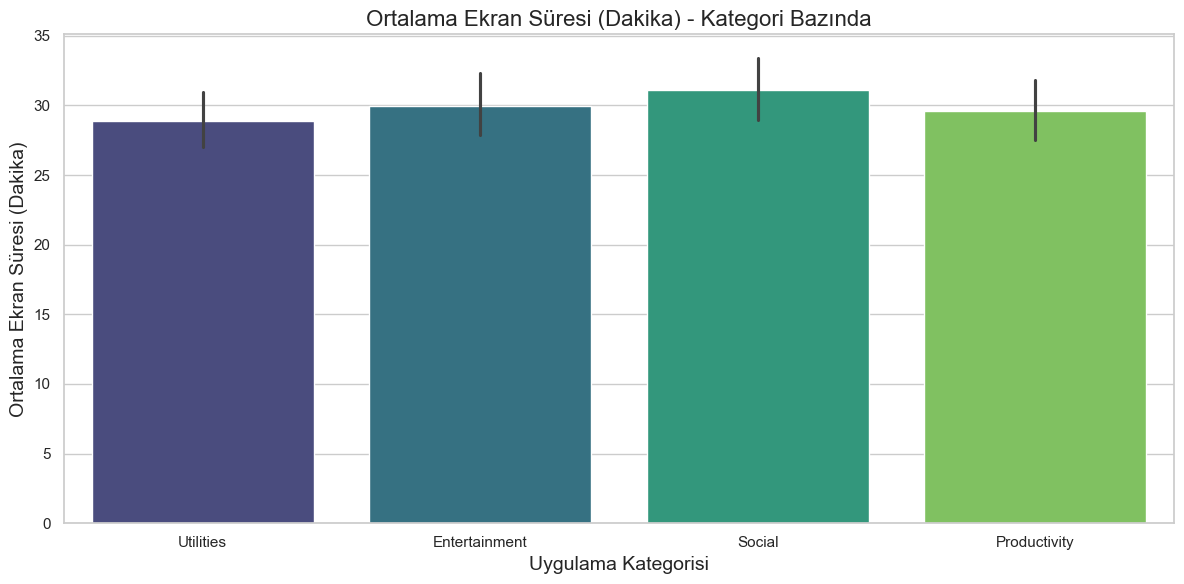

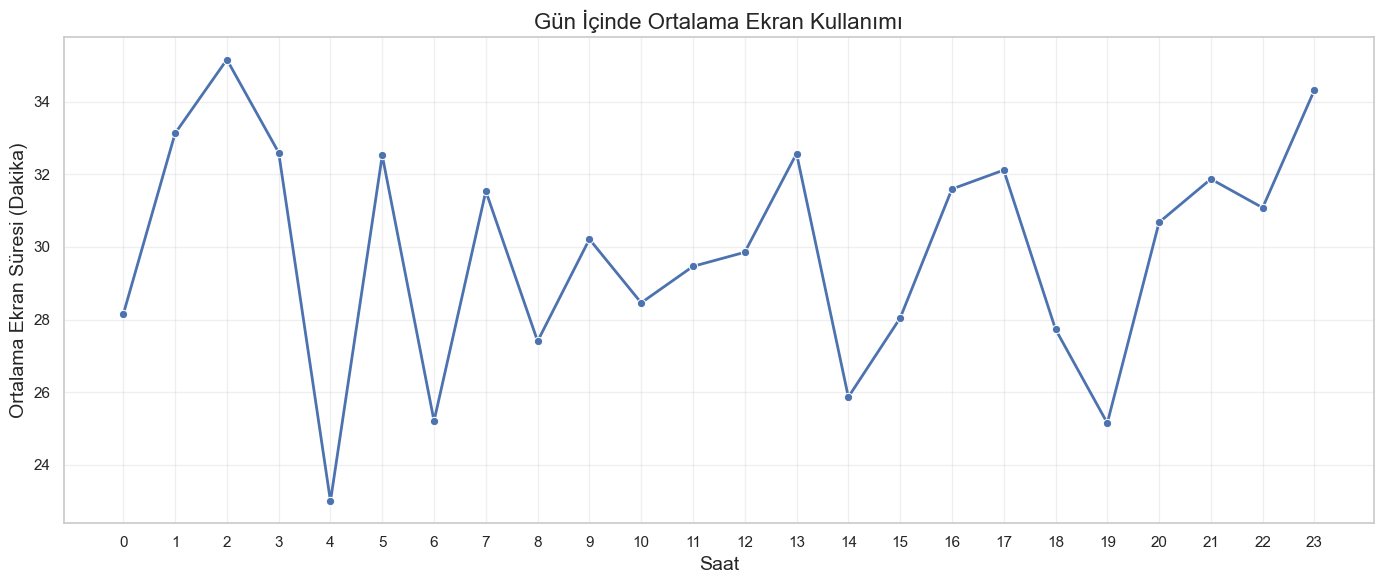

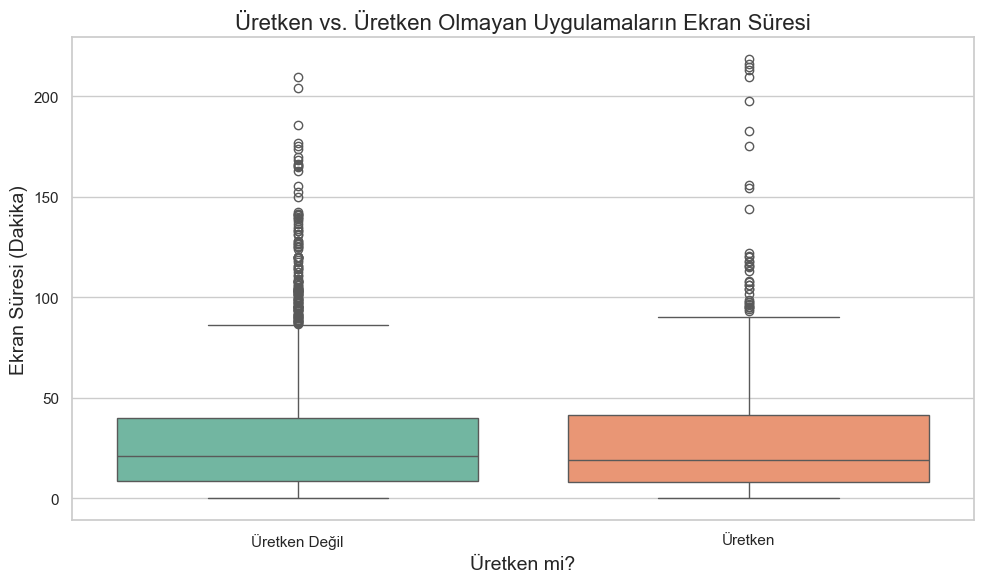

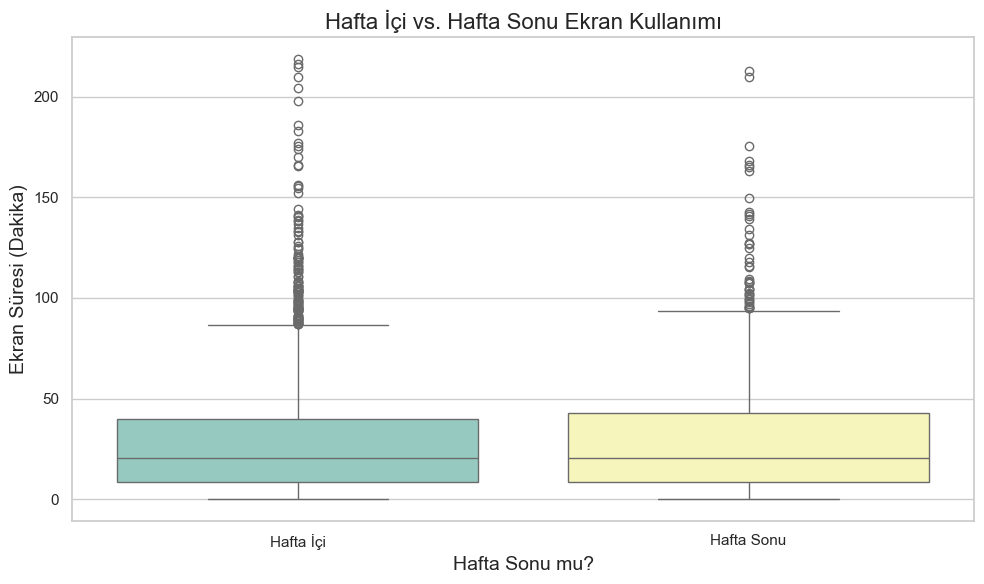

In [24]:
# Ekran süresi veri seti görselleştirmeleri
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme ayarları
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# 1. Uygulama kategorilerine göre ortalama ekran süresi
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='screen_time_min', data=screen_time_df, palette='viridis')
plt.title('Ortalama Ekran Süresi (Dakika) - Kategori Bazında', fontsize=16)
plt.xlabel('Uygulama Kategorisi', fontsize=14)
plt.ylabel('Ortalama Ekran Süresi (Dakika)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Gün içinde ekran kullanımı
plt.figure(figsize=(14, 6))
hourly_usage = screen_time_df.groupby('hour')['screen_time_min'].mean().reset_index()
sns.lineplot(x='hour', y='screen_time_min', data=hourly_usage, marker='o', linewidth=2)
plt.title('Gün İçinde Ortalama Ekran Kullanımı', fontsize=16)
plt.xlabel('Saat', fontsize=14)
plt.ylabel('Ortalama Ekran Süresi (Dakika)', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Üretken vs. Üretken Olmayan Uygulamaların Ekran Süresi Karşılaştırması
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_productive', y='screen_time_min', data=screen_time_df, palette='Set2')
plt.title('Üretken vs. Üretken Olmayan Uygulamaların Ekran Süresi', fontsize=16)
plt.xlabel('Üretken mi?', fontsize=14)
plt.ylabel('Ekran Süresi (Dakika)', fontsize=14)
plt.xticks([0, 1], ['Üretken Değil', 'Üretken'])
plt.tight_layout()
plt.show()

# 4. Hafta içi vs. Hafta sonu Ekran Kullanımı
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='screen_time_min', data=screen_time_df, palette='Set3')
plt.title('Hafta İçi vs. Hafta Sonu Ekran Kullanımı', fontsize=16)
plt.xlabel('Hafta Sonu mu?', fontsize=14)
plt.ylabel('Ekran Süresi (Dakika)', fontsize=14)
plt.xticks([0, 1], ['Hafta İçi', 'Hafta Sonu'])
plt.tight_layout()
plt.show()

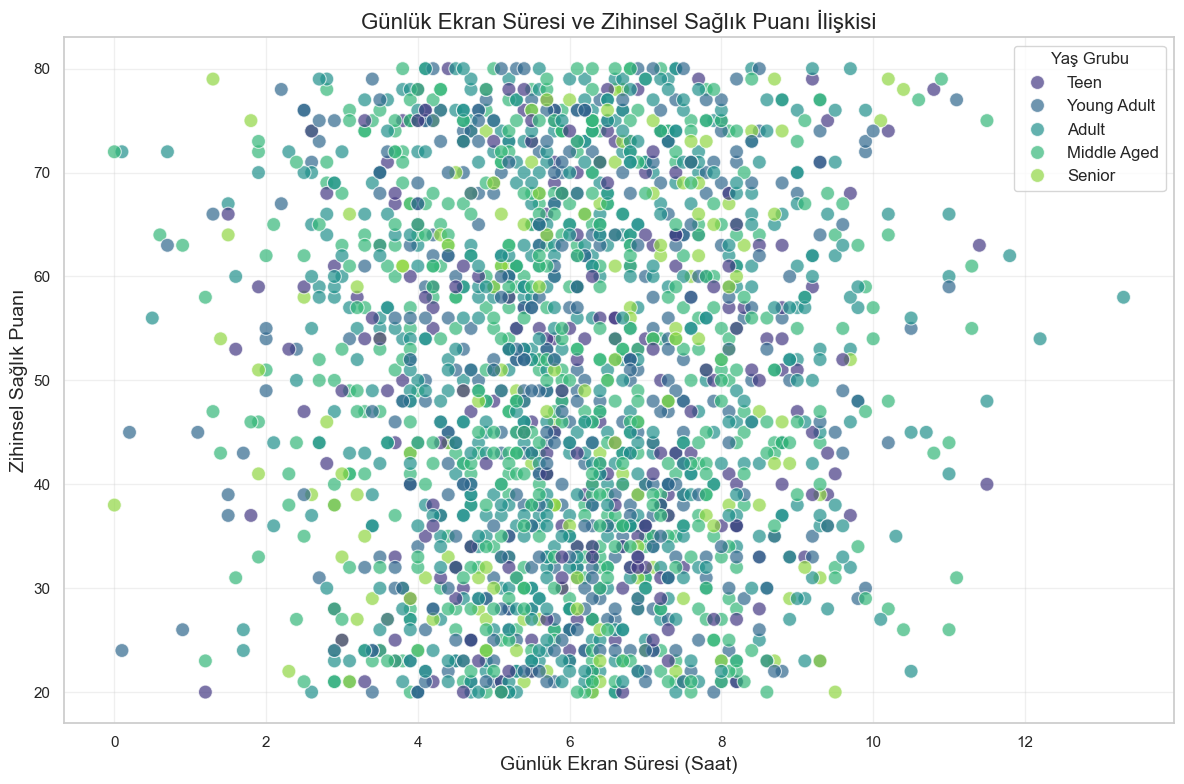

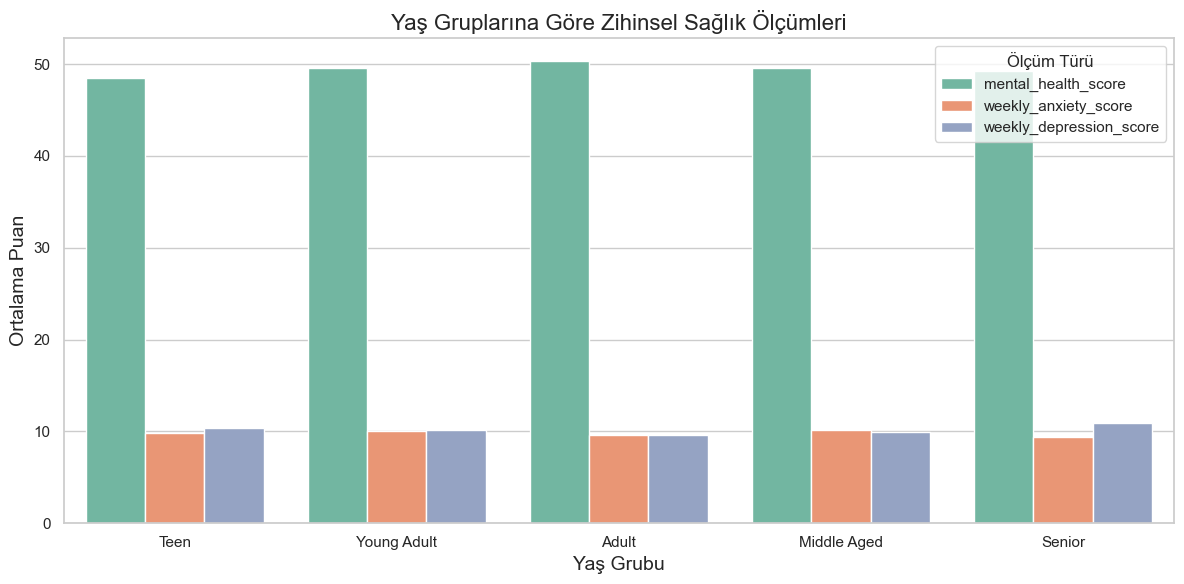

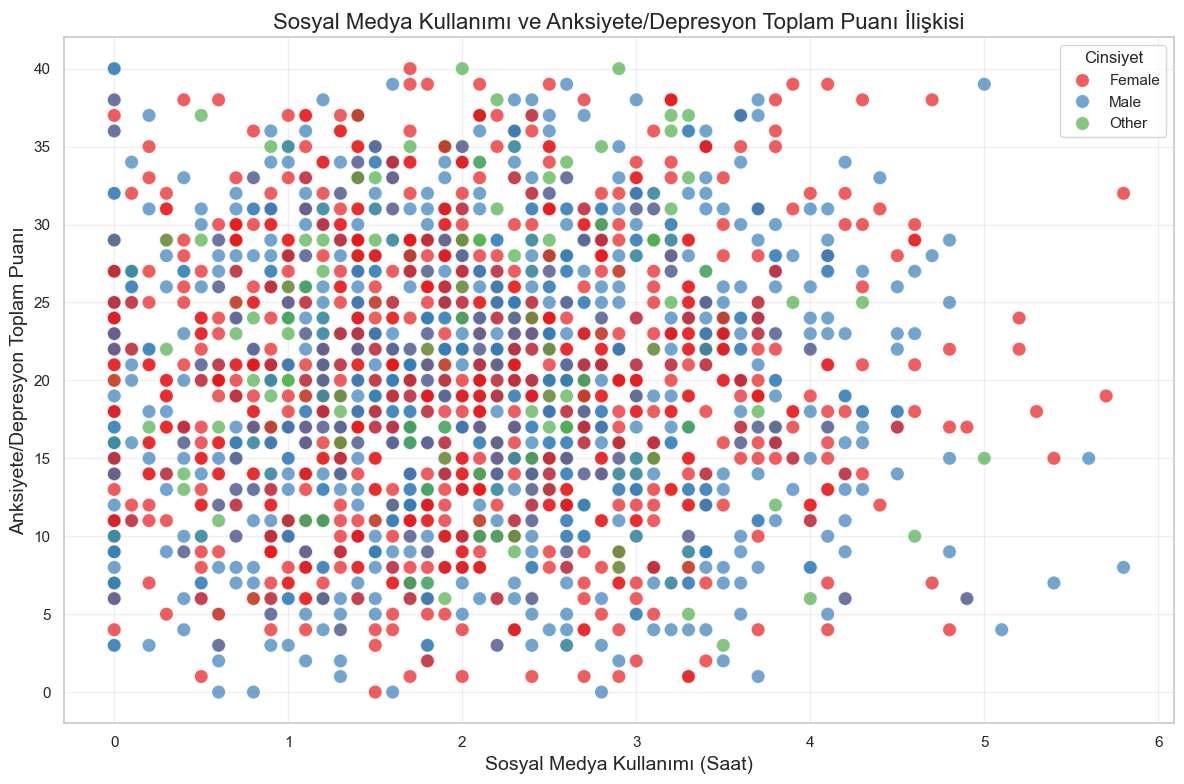

<Figure size 1200x800 with 0 Axes>

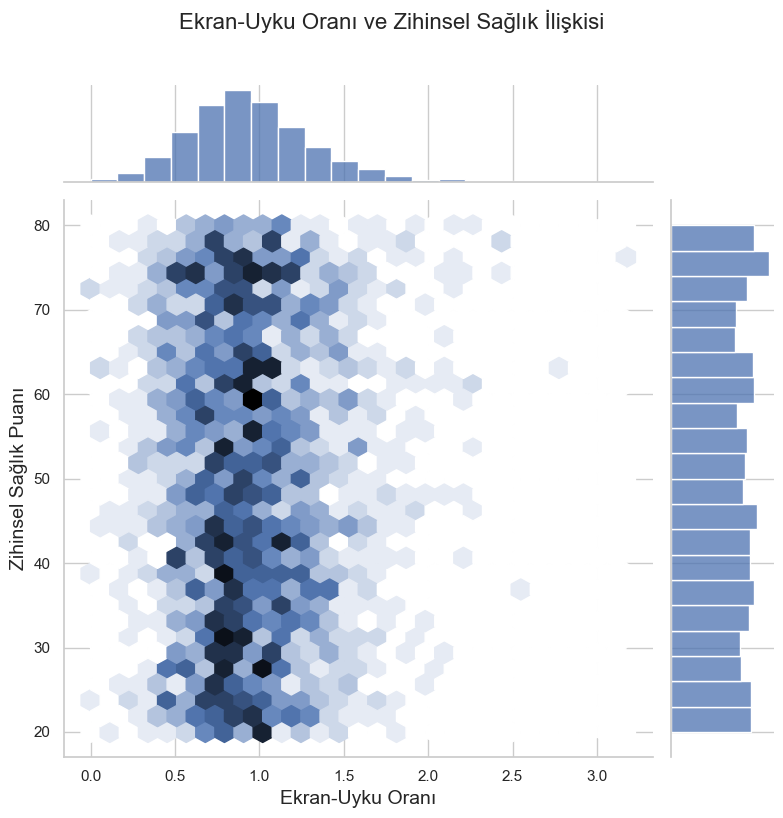

In [25]:
# Zihinsel sağlık veri seti görselleştirmeleri

# 1. Günlük ekran süresi ve zihinsel sağlık puanı arasındaki ilişki
plt.figure(figsize=(12, 8))
sns.scatterplot(x='daily_screen_time_hours', y='mental_health_score', 
                hue='age_group', data=mental_health_df, palette='viridis', s=100, alpha=0.7)
plt.title('Günlük Ekran Süresi ve Zihinsel Sağlık Puanı İlişkisi', fontsize=16)
plt.xlabel('Günlük Ekran Süresi (Saat)', fontsize=14)
plt.ylabel('Zihinsel Sağlık Puanı', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Yaş Grubu', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Yaş gruplarına göre ortalama zihinsel sağlık puanları
plt.figure(figsize=(12, 6))
age_mental_health = mental_health_df.groupby('age_group')[['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score']].mean().reset_index()
age_mental_health = age_mental_health.melt(id_vars='age_group', 
                                          value_vars=['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score'],
                                          var_name='Ölçüm', value_name='Ortalama Puan')
sns.barplot(x='age_group', y='Ortalama Puan', hue='Ölçüm', data=age_mental_health, palette='Set2')
plt.title('Yaş Gruplarına Göre Zihinsel Sağlık Ölçümleri', fontsize=16)
plt.xlabel('Yaş Grubu', fontsize=14)
plt.ylabel('Ortalama Puan', fontsize=14)
plt.legend(title='Ölçüm Türü')
plt.tight_layout()
plt.show()

# 3. Sosyal medya kullanımı ve anksiyete/depresyon ilişkisi
plt.figure(figsize=(12, 8))
sns.scatterplot(x='social_media_hours', y='anxiety_depression_sum', 
                hue='gender', data=mental_health_df, palette='Set1', s=100, alpha=0.7)
plt.title('Sosyal Medya Kullanımı ve Anksiyete/Depresyon Toplam Puanı İlişkisi', fontsize=16)
plt.xlabel('Sosyal Medya Kullanımı (Saat)', fontsize=14)
plt.ylabel('Anksiyete/Depresyon Toplam Puanı', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()

# 4. Ekran-uyku oranı ve zihinsel sağlık ilişkisi
plt.figure(figsize=(12, 8))
g = sns.jointplot(x='screen_sleep_ratio', y='mental_health_score', 
                data=mental_health_df, kind='hex', height=8, marginal_kws=dict(bins=20, fill=True))
g.fig.suptitle('Ekran-Uyku Oranı ve Zihinsel Sağlık İlişkisi', fontsize=16, y=1.02)
g.set_axis_labels('Ekran-Uyku Oranı', 'Zihinsel Sağlık Puanı', fontsize=14)
plt.tight_layout()
plt.show()

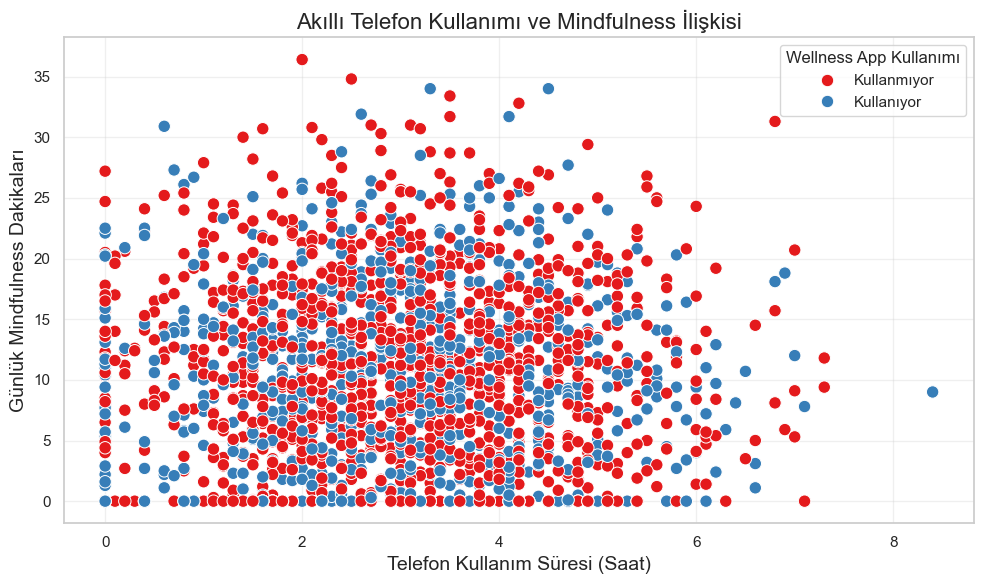

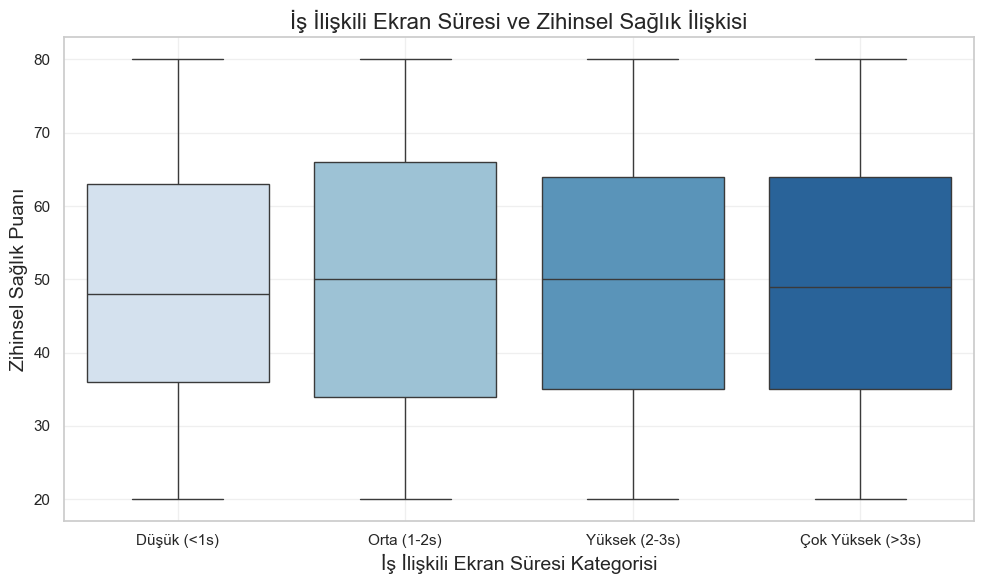

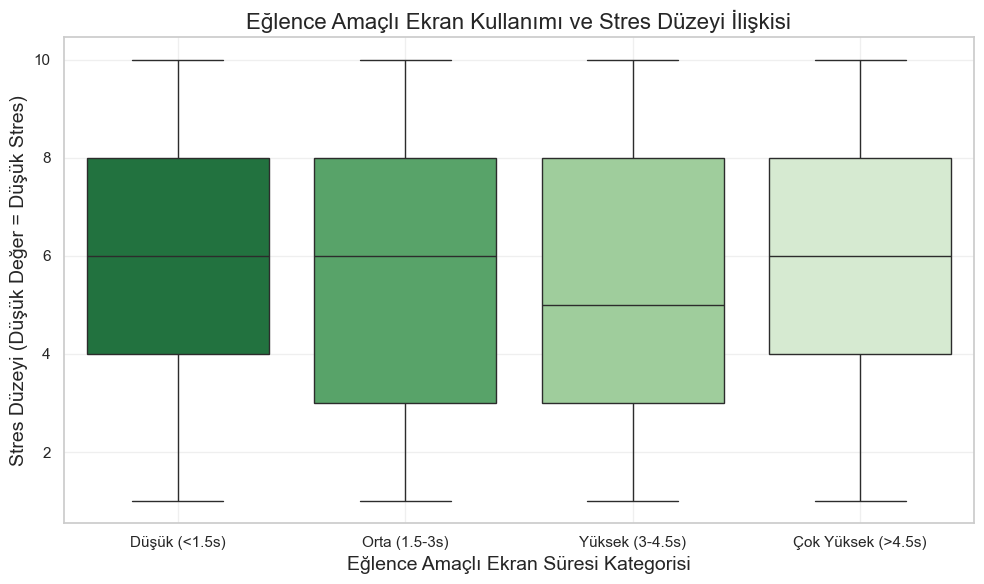

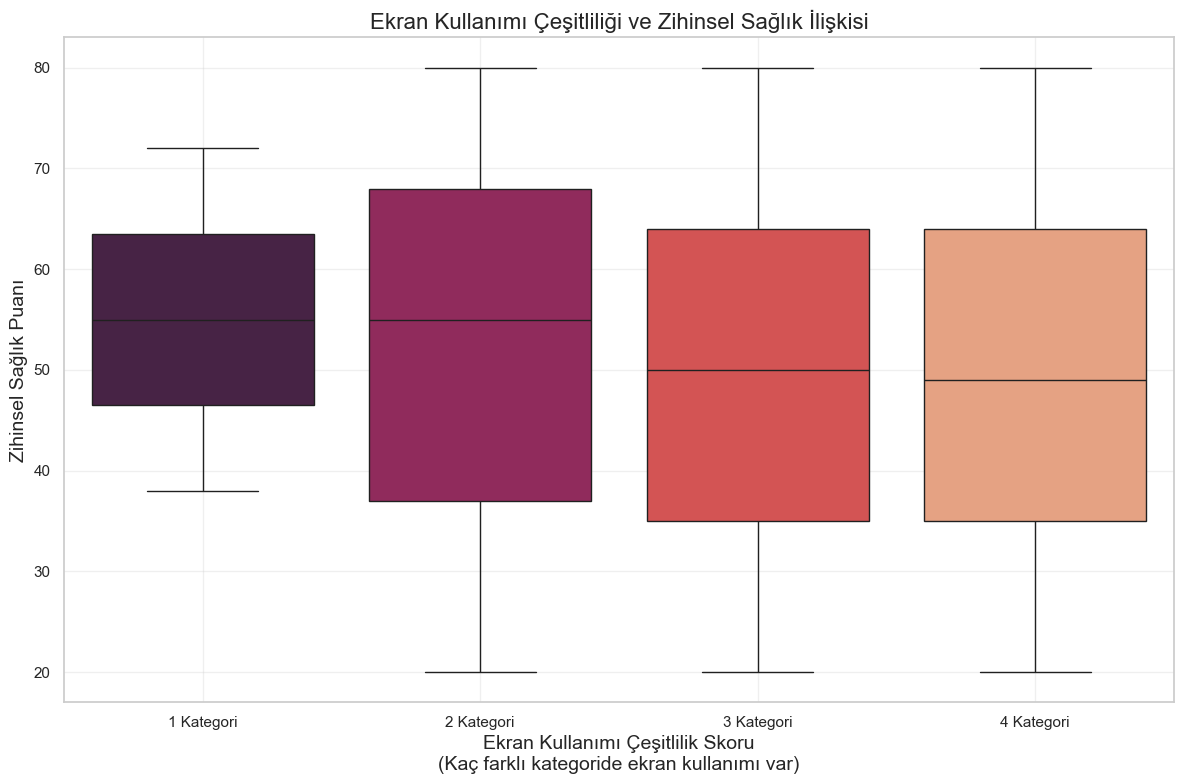

In [26]:
# Ekran kullanımının potansiyel faydalı etkileri

# 1. Akıllı telefon kullanımı ve mindfulness arasındaki ilişki
plt.figure(figsize=(10, 6))
# Wellness app kullanımına göre gruplandırma
g = sns.scatterplot(x='phone_usage_hours', y='mindfulness_minutes_per_day', 
                   hue='uses_wellness_apps', data=mental_health_df, palette='Set1', s=80)
plt.title('Akıllı Telefon Kullanımı ve Mindfulness İlişkisi', fontsize=16)
plt.xlabel('Telefon Kullanım Süresi (Saat)', fontsize=14)
plt.ylabel('Günlük Mindfulness Dakikaları', fontsize=14)
g.legend_.set_title('Wellness App Kullanımı')
new_labels = ['Kullanmıyor', 'Kullanıyor']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. İş-ilişkili ekran süresi ve zihinsel sağlık ilişkisi
plt.figure(figsize=(10, 6))
# İş-ilişkili ekran süresini kategorilere ayırma
mental_health_df['work_screen_cat'] = pd.cut(mental_health_df['work_related_hours'], 
                                           bins=[0, 1, 2, 3, 6], 
                                           labels=['Düşük (<1s)', 'Orta (1-2s)', 'Yüksek (2-3s)', 'Çok Yüksek (>3s)'])
sns.boxplot(x='work_screen_cat', y='mental_health_score', data=mental_health_df, palette='Blues')
plt.title('İş İlişkili Ekran Süresi ve Zihinsel Sağlık İlişkisi', fontsize=16)
plt.xlabel('İş İlişkili Ekran Süresi Kategorisi', fontsize=14)
plt.ylabel('Zihinsel Sağlık Puanı', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Eğlence amaçlı ekran kullanımı ve stres düzeyi ilişkisi
plt.figure(figsize=(10, 6))
# Eğlence amaçlı ekran süresini kategorilere ayırma
mental_health_df['entertainment_cat'] = pd.cut(mental_health_df['entertainment_hours'], 
                                             bins=[0, 1.5, 3, 4.5, 7], 
                                             labels=['Düşük (<1.5s)', 'Orta (1.5-3s)', 'Yüksek (3-4.5s)', 'Çok Yüksek (>4.5s)'])
sns.boxplot(x='entertainment_cat', y='stress_level', data=mental_health_df, palette='Greens_r')
plt.title('Eğlence Amaçlı Ekran Kullanımı ve Stres Düzeyi İlişkisi', fontsize=16)
plt.xlabel('Eğlence Amaçlı Ekran Süresi Kategorisi', fontsize=14)
plt.ylabel('Stres Düzeyi (Düşük Değer = Düşük Stres)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Ekran kullanımının çeşitliliği ve zihinsel sağlık ilişkisi
plt.figure(figsize=(12, 8))

# Ekran kullanımı çeşitlilik skoru oluşturma (kullanım oranlarının dengesi)
mental_health_df['screen_diversity'] = (
    (mental_health_df['social_ratio'] > 0).astype(int) + 
    (mental_health_df['work_ratio'] > 0).astype(int) + 
    (mental_health_df['entertainment_ratio'] > 0).astype(int) + 
    (mental_health_df['gaming_ratio'] > 0).astype(int)
)

sns.boxplot(x='screen_diversity', y='mental_health_score', data=mental_health_df, palette='rocket')
plt.title('Ekran Kullanımı Çeşitliliği ve Zihinsel Sağlık İlişkisi', fontsize=16)
plt.xlabel('Ekran Kullanımı Çeşitlilik Skoru\n(Kaç farklı kategoride ekran kullanımı var)', fontsize=14)
plt.ylabel('Zihinsel Sağlık Puanı', fontsize=14)
plt.xticks([0, 1, 2, 3], ['1 Kategori', '2 Kategori', '3 Kategori', '4 Kategori'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

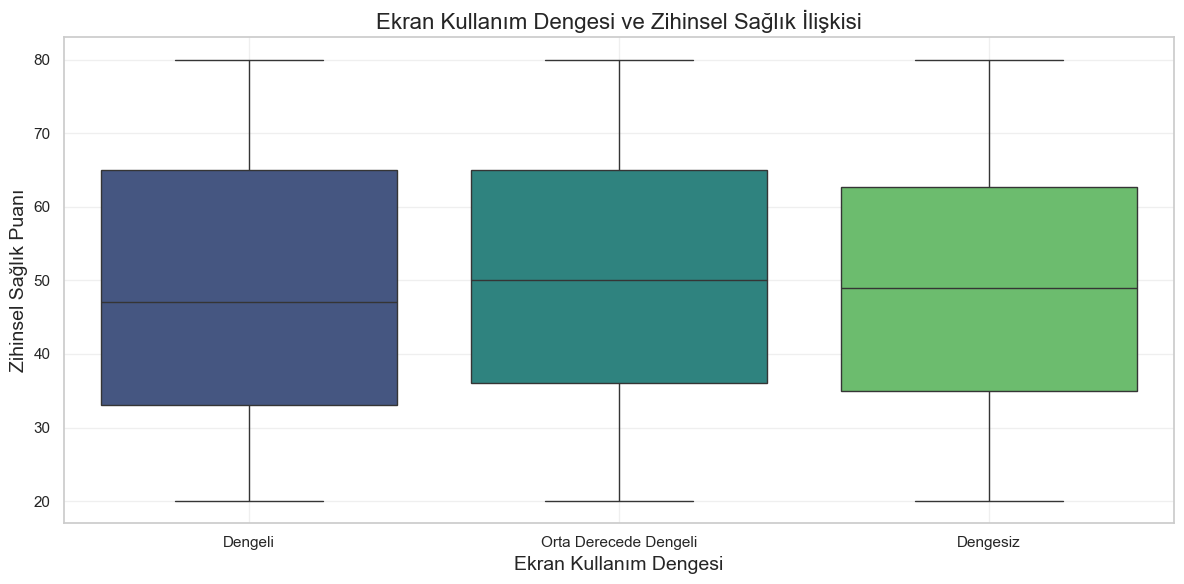

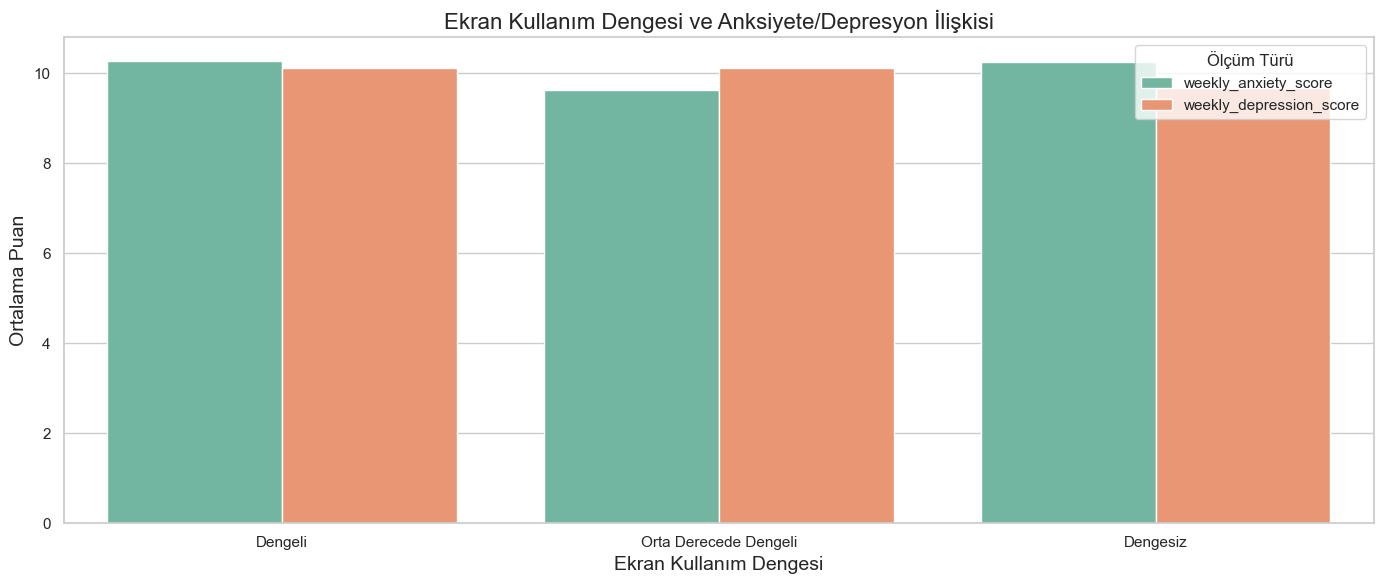

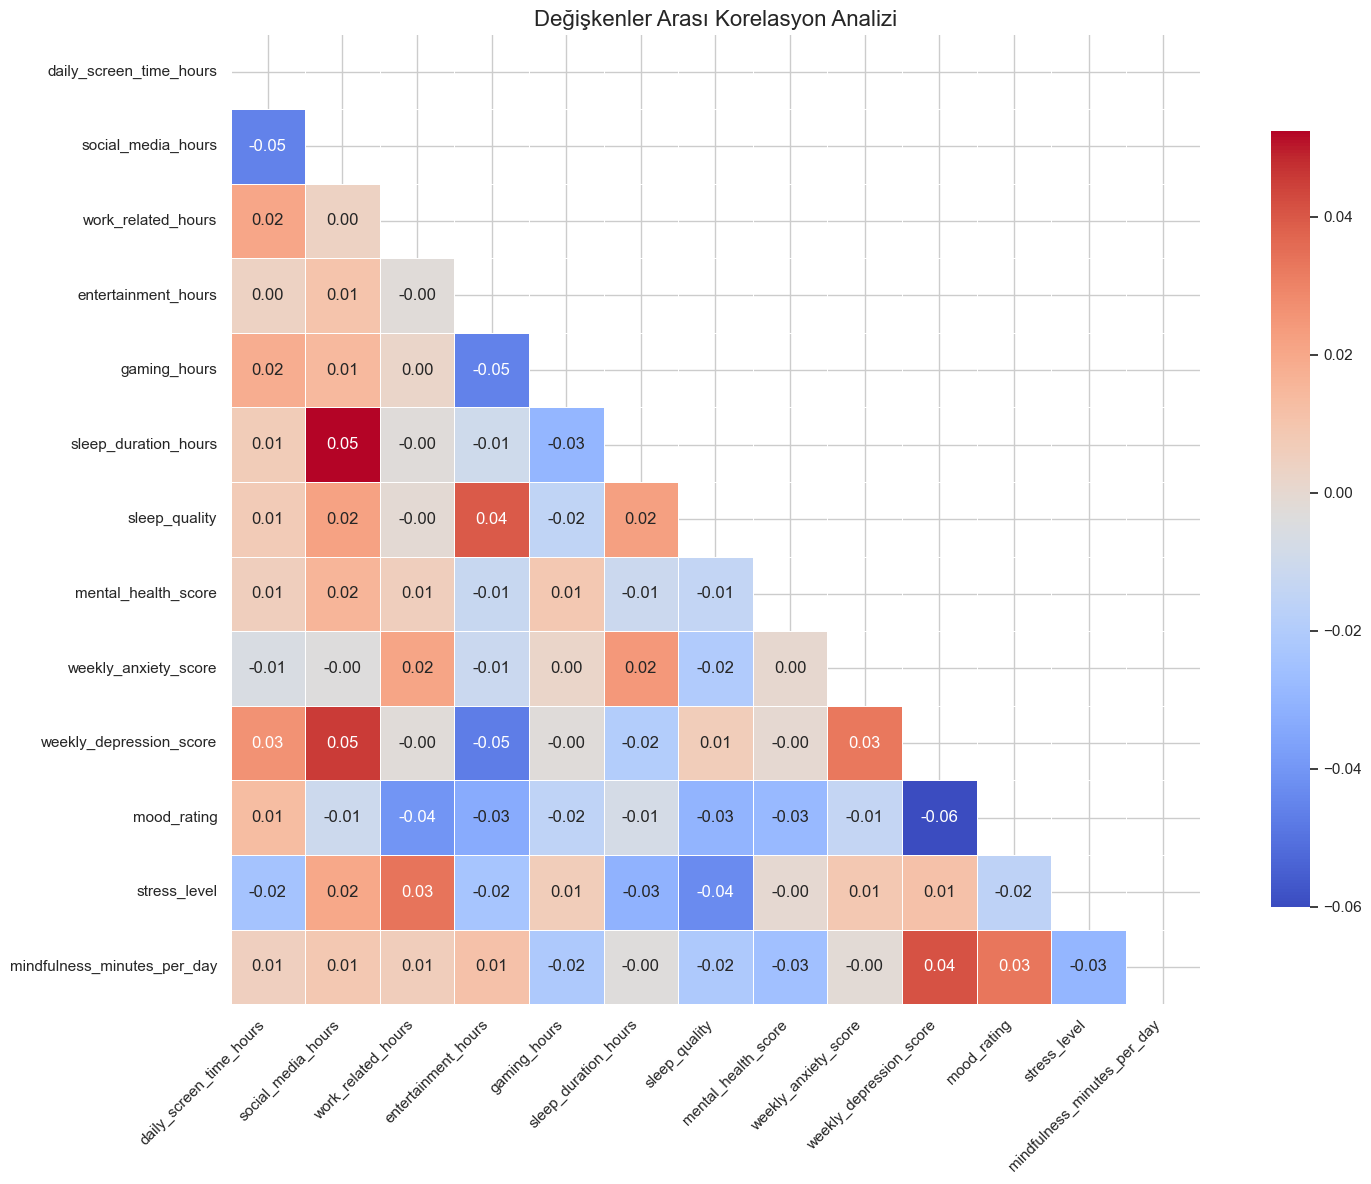

In [27]:
# Ekran kullanımı dengesi ve zihinsel sağlık

# Dengeli ve dengesiz ekran kullanımını tanımlama
# Standard sapmaları hesapla
mental_health_df['usage_std'] = mental_health_df[['social_media_hours', 'work_related_hours', 
                                                'entertainment_hours', 'gaming_hours']].std(axis=1)

# Standart sapmaya göre kullanım dengesi kategorisi oluştur
mental_health_df['usage_balance'] = pd.cut(mental_health_df['usage_std'], 
                                         bins=[0, 0.8, 1.6, 3], 
                                         labels=['Dengeli', 'Orta Derecede Dengeli', 'Dengesiz'])

# 1. Ekran kullanım dengesi ve zihinsel sağlık ilişkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='usage_balance', y='mental_health_score', data=mental_health_df, palette='viridis')
plt.title('Ekran Kullanım Dengesi ve Zihinsel Sağlık İlişkisi', fontsize=16)
plt.xlabel('Ekran Kullanım Dengesi', fontsize=14)
plt.ylabel('Zihinsel Sağlık Puanı', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Ekran kullanım dengesi ve anksiyete/depresyon ilişkisi
plt.figure(figsize=(14, 6))
balance_metrics = mental_health_df.groupby('usage_balance')[['weekly_anxiety_score', 'weekly_depression_score']].mean().reset_index()
balance_metrics = balance_metrics.melt(id_vars='usage_balance', 
                                     value_vars=['weekly_anxiety_score', 'weekly_depression_score'],
                                     var_name='Ölçüm', value_name='Ortalama Puan')
sns.barplot(x='usage_balance', y='Ortalama Puan', hue='Ölçüm', data=balance_metrics, palette='Set2')
plt.title('Ekran Kullanım Dengesi ve Anksiyete/Depresyon İlişkisi', fontsize=16)
plt.xlabel('Ekran Kullanım Dengesi', fontsize=14)
plt.ylabel('Ortalama Puan', fontsize=14)
plt.legend(title='Ölçüm Türü')
plt.tight_layout()
plt.show()

# 3. Korelasyon ısı haritası
plt.figure(figsize=(16, 12))
# Analiz için önemli sütunları seçme
cols_to_analyze = ['daily_screen_time_hours', 'social_media_hours', 'work_related_hours', 
                  'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 
                  'mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score',
                  'mood_rating', 'stress_level', 'mindfulness_minutes_per_day']

# Korelasyon matrisini hesapla
corr_matrix = mental_health_df[cols_to_analyze].corr()

# Isı haritası oluştur
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True,
           linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Değişkenler Arası Korelasyon Analizi', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()